In [73]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
import jieba

#!pip uninstall googletrans -y
#import googletrans
#googletrans.__version__
from bertalign import Bertalign


#!pip install git+https://github.com/bfsujason/bertalign.git
#!pip install googletrans
#!pip install sentence_splitter
#!pip install faiss-cpu
!pip install numba

#!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
!pip install jieba
embedder = SentenceTransformer("distiluse-base-multilingual-cased-v1")

def read_cn_text_from_file(filename):
  """Reads text from a file and returns a list of lines."""
  with open(filename, "r") as f:
    lines = f.readlines()

  for i in range(len(lines)):
    lines[i] = lines[i].strip()

  sentences = []
  for line in lines:
    sentences.extend(line.split("."))
 
  return sentences#'''
    
def read_text_from_file(filename):
  """Reads text from a file and returns a list of strings, where each string is a sentence."""

  with open(filename, "r") as f:
    text = f.read()

  text = text.replace("\n", "")

  sentences = text.split(".")

  sentences = [sentence for sentence in sentences if sentence]

  return sentences

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [74]:
en_transcription_file = 'stimuli_task-lppEN_section-1.txt'
fr_transcription_file  = 'stimuli_task-lppFR_section-1.txt'
cn_transcription_file  = 'stimuli_task-lppCN_section-1.txt'

en_lines = read_text_from_file(en_transcription_file)
cn_lines = read_cn_text_from_file(cn_transcription_file)
fr_lines = read_text_from_file(fr_transcription_file)


In [75]:
#for line in en_lines:
#    print(line)

In [76]:
print(len(en_lines))
print(len(cn_lines))
print(len(fr_lines))

99
319
110


In [77]:
cn_lines[:5]

['當我還只有六歲的時候', '在一本描寫原始森林的', '名叫真實的故事的書中', '看到了一幅精彩的插畫', '畫的是一條網舌正在吞時一隻大野獸']

In [78]:
pd.DataFrame(en_lines).to_csv('english_sentences.csv')
pd.DataFrame(cn_lines).to_csv('chinese_sentences.csv')
pd.DataFrame(fr_lines).to_csv('french_sentences.csv')

In [79]:
fr_embeddings = []
for curr_line in fr_lines:
    fr_embeddings.append(embedder.encode(curr_line))
print(len(fr_embeddings))

en_embeddings = []
for curr_line in en_lines:
    en_embeddings.append(embedder.encode(curr_line))
print(len(en_embeddings))

cn_embeddings = []
for curr_line in cn_lines:
    cn_embeddings.append(embedder.encode(curr_line))
print(len(cn_embeddings))

110
99
319


In [80]:
fr_embeddings = np.asarray(fr_embeddings)
en_embeddings = np.asarray(en_embeddings)
cn_embeddings = np.asarray(cn_embeddings)


print(fr_embeddings.shape)
print(en_embeddings.shape)
print(cn_embeddings.shape)

(110, 512)
(99, 512)
(319, 512)


In [81]:
l_en = en_embeddings.shape[0]
l_fr = fr_embeddings.shape[0]
l_cn = cn_embeddings.shape[0]


res_en_fr = np.zeros((l_en, l_fr)) 
print(res_en_fr.shape)

for i in range(l_en):
  curr_1 = en_embeddings[i,:]
  for j in range(l_fr):
    curr_2 = fr_embeddings[j,:]
    res_en_fr[i,j] = (np.corrcoef(curr_1, curr_2)[0,1])

######
res_en_cn = np.zeros((l_en, l_cn)) 
print(res_en_cn.shape)

for i in range(l_en):
  curr_1 = en_embeddings[i,:]
  for j in range(l_cn):
    curr_2 = cn_embeddings[j,:]
    res_en_cn[i,j] = (np.corrcoef(curr_1, curr_2)[0,1])


######
res_fr_cn = np.zeros((l_fr, l_cn)) 
print(res_fr_cn.shape)

for i in range(l_fr):
  curr_1 = fr_embeddings[i,:]
  for j in range(l_cn):
    curr_2 = cn_embeddings[j,:]
    res_fr_cn[i,j] = (np.corrcoef(curr_1, curr_2)[0,1])

(99, 110)
(99, 319)
(110, 319)


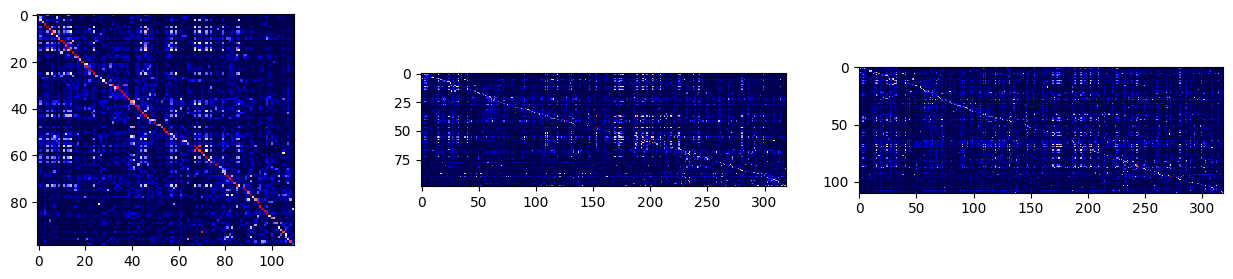

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16, 3));

min = 0.1
max = 1
#count = :

ax[0].imshow(res_en_fr, cmap = 'seismic', interpolation = 'nearest', vmin = min, vmax = max);
ax[1].imshow(res_en_cn[:, :], cmap = 'seismic', interpolation = 'nearest', vmin = min, vmax = max);
ax[2].imshow(res_fr_cn[:, :], cmap = 'seismic', interpolation = 'nearest', vmin = min, vmax = max);


#plt.colorbar();

In [83]:
cn_lines[:4]

['當我還只有六歲的時候', '在一本描寫原始森林的', '名叫真實的故事的書中', '看到了一幅精彩的插畫']

In [53]:
cn_lines = " ".join(cn_lines)
cn_lines

'當我還只有六歲的時候 在一本描寫原始森林的 名叫真實的故事的書中 看到了一幅精彩的插畫 畫的是一條網舌正在吞時一隻大野獸 夜頭上就是那幅畫的模本 這本書中寫到 這些網舌把他們的獵貨物 不加舉掘的胡輪吞下 然後就不能再動它了 他們就在常常的六個月的睡眠中 消化這些事物 當時 我對從林中的奇域想得很多 於是我也用彩色牽壁 畫出了我的第一幅圖畫 我的第一號作品 它是這樣的 我把我的這幅節奏拿給大人看 我問他們 我的話是不是叫他們害怕 他們回答我說 害怕 一定帽子有什麼可怕的 我畫的不是帽子 是一條巨盲在消化著一頭大象 既然大人們不能夠理解 於是我又把巨盲 都子裡的情況畫得出來 以便讓大人們能夠看懂 這些大人總是需要解釋 我的第二號作品是這樣的 大人們勸我把這些畫著 開著肚皮的 或閉上肚皮的 網舌的圖畫放在一邊 還是把興趣放在地裡 歷史算數於法上 就這樣 在六歲的那年 我就放棄了當畫家 這一美好的職業 我的第一號 第二號作品的不成功 是我洩了氣 這些大人們 靠他們自己什麼業弄不懂 還得老師不斷地給他們做解釋 後來 我只好選擇了另外一個職業 我學會了開飛機 世界各地差不多都飛到過 的確 地理學幫了我很大的忙 我一眼就能分辨出中國和亞里桑 要是業里迷失了行將 這是很有用的 這樣在我的生活中 我跟許多嚴肅的人 有過很多的接觸 我在大人們中間生活過很長時間 我仔細地觀察過他們 但這並沒有使我 對他們的看法有多大的改變 當我遇到一個 同腦看來稍微清楚地大人時 我就拿出一支保存這的 我那第一號作品來測試測試它 我想知道 它是否真的有理解能力 可是得到的回答總是 這是點帽子 我就不和它談劇猛 原始森林 或者新興之類的事 我只得簽救它的水平 和他們談些橋牌 高爾夫球要正這樣 領導也這些 於是大人們就十分高興 能認識我這樣一個 同情打理的人 我就這樣孤獨的生活著 沒有一個能真正談得來的人 一直到六年前 在沙哈拉沙漠上 發生了那次故障 我的發動機裡有個東西所壞了 當時由於我寄沒有帶機械師 也沒有帶旅客 我就試圖 獨自完成這個困難的維修工作 這對我來說 是個生於死的問題 我隨身帶的水 只夠引用異性期 第一天晚上 我就睡在這遠離人間 淹火的大沙漠上 我比大海中 浮在小木牌上的雲南者 還要孤獨的多 而在第二天浮小 當一個奇怪的小聲音 叫醒我的時候 你們可以想見 我當時是多麼吃驚 這小小的聲音說到 

In [54]:
#seg_list = jieba.cut_for_search(cn_lines)
#print("Full Mode: " + " ".join(seg_list))  # 全模式


In [4]:
src = """两年以后，大兴安岭。
“顺山倒咧——”
随着这声嘹亮的号子，一棵如巴特农神庙的巨柱般高大的落叶松轰然倒下，叶文洁感到大地抖动了一下。她拿起斧头和短锯，开始去除巨大树身上的枝丫。每到这时，她总觉得自己是在为一个巨人整理遗体。她甚至常常有这样的想象：这巨人就是自己的父亲。两年前那个凄惨的夜晚，她在太平间为父亲整理遗容时的感觉就在这时重现。巨松上那绽开的树皮，似乎就是父亲躯体上累累的伤痕。
内蒙古生产建设兵团的六个师四十一个团十多万人就分布在这辽阔的森林和草原之间。刚从城市来到这陌生的世界时，很多兵团知青都怀着一个浪漫的期望：当苏修帝国主义的坦克集群越过中蒙边境时，他们将飞快地武装起来，用自己的血肉构成共和国的第一道屏障。事实上，这也确实是兵团组建时的战略考虑之一。但他们渴望的战争就像草原天边那跑死马的远山，清晰可见，但到不了眼前，于是他们只有垦荒、放牧和砍伐。这些曾在“大串联”中燃烧青春的年轻人很快发现，与这广阔天地相比，内地最大的城市不过是个羊圈；在这寒冷无际的草原和森林间，燃烧是无意义的，一腔热血喷出来，比一堆牛粪凉得更快，还不如后者有使用价值。但燃烧是他们的命运，他们是燃烧的一代。于是，在他们的油锯和电锯下，大片的林海化为荒山秃岭；在他们的拖拉机和康拜因（联合收割机）下，大片的草原被犁成粮田，然后变成沙漠。
叶文洁看到的砍伐只能用疯狂来形容，高大挺拔的兴安岭落叶松、四季常青的樟子松、亭亭玉立的白桦、耸入云天的山杨、西伯利亚冷杉，以及黑桦、柞树、山榆、水曲柳、钻天柳、蒙古栎，见什么伐什么，几百把油锯如同一群钢铁蝗虫，她的连队所过之处，只剩下一片树桩。
整理好的落叶松就要被履带拖拉机拖走了，在树干另一头，叶文洁轻轻抚摸了一下那崭新的锯断面，她常常下意识地这么做，总觉得那是一处巨大的伤口，似乎能感到大树的剧痛。她突然看到，在不远处树桩的锯断面上，也有一只在轻轻抚摸的手，那手传达出的心灵的颤抖，与她产生了共振。那手虽然很白皙，但能够看出是属于男性的。叶文洁抬头，看到抚摸树桩的人是白沐霖，一个戴眼镜的瘦弱青年，他是兵团《大生产报》的记者，前天刚到连队来采访。叶文洁看过他写的文章，文笔很好，其中有一种与这个粗放环境很不协调的纤细和敏感，令她很难忘。"""

tgt = """Two years later, the Greater Khingan Mountains
“Tim-ber…”
Following the loud chant, a large Dahurian larch, thick as the columns of the Parthenon, fell with a thump, and Ye Wenjie felt the earth quake.
She picked up her ax and saw and began to clear the branches from the trunk. Every time she did this, she felt as though she were cleaning the corpse of a giant. Sometimes she even imagined the giant was her father. The feelings from that terrible night two years ago when she cleaned her father’s body in the mortuary would resurface, and the splits and cracks in the larch bark seemed to turn into the old scars and new wounds covering her father.
Over one hundred thousand people from the six divisions and forty-one regiments of the Inner Mongolia Production and Construction Corps were scattered among the vast forests and grasslands. When they first left the cities and arrived at this unfamiliar wilderness, many of the corps’ “educated youths”—young college students who no longer had schools to go to—had cherished a romantic wish: When the tank clusters of the Soviet Revisionist Imperialists rolled over the Sino-Mongolian border, they would arm themselves and make their own bodies the first barrier in the Republic’s defense. Indeed, this expectation was one of the strategic considerations motivating the creation of the Production and Construction Corps.
But the war they craved was like a mountain at the other end of the grassland: clearly visible, but as far away as a mirage. So they had to content themselves with clearing fields, grazing animals, and chopping down trees.
Soon, the young men and women who had once expended their youthful energy on tours to the holy sites of the Chinese Revolution discovered that, compared to the huge sky and open air of Inner Mongolia, the biggest cities in China’s interior were nothing more than sheep pens. Stuck in the middle of the cold, endless expanse of forests and grasslands, their burning ardor was meaningless. Even if they spilled all of their blood, it would cool faster than a pile of cow dung, and not be as useful. But burning was their fate; they were the generation meant to be consumed by fire. And so, under their chain saws, vast seas of forests turned into barren ridges and denuded hills. Under their tractors and combine harvesters, vast tracts of grasslands became grain fields, then deserts.
Ye Wenjie could only describe the deforestation that she witnessed as madness. The tall Dahurian larch, the evergreen Scots pine, the slim and straight white birch, the cloud-piercing Korean aspen, the aromatic Siberian fir, along with black birch, oak, mountain elm, Chosenia arbutifolia—whatever they laid eyes on, they cut down. Her company wielded hundreds of chain saws like a swarm of steel locusts, and after they passed, only stumps were left.
The fallen Dahurian larch, now bereft of branches, was ready to be taken away by tractor. Ye gently caressed the freshly exposed cross section of the felled trunk. She did this often, as though such surfaces were giant wounds, as though she could feel the tree’s pain. Suddenly, she saw another hand lightly stroking the matching surface of the stump a few feet away. The tremors in that hand revealed a heart that resonated with hers. Though the hand was pale, she could tell it belonged to a man.
She looked up. It was Bai Mulin. A slender, delicate man who wore glasses, he was a reporter for the Great Production News, the corps’ newspaper. He had arrived the day before yesterday to gather news about her company. Ye remembered reading his articles, which were written in a beautiful style, sensitive and fine, ill suited to the rough-hewn environment."""


In [70]:
en_src = '\n '.join(en_lines)
en_src[:200]

'Once, when I was six years old, I saw a magnificent picture in a book about the primeval forest called Real Life Stories\n It showed a boa constrictor swallowing a wild animal\n  Here is a copy of the d'

In [84]:
cn_lines[:5]

['當我還只有六歲的時候', '在一本描寫原始森林的', '名叫真實的故事的書中', '看到了一幅精彩的插畫', '畫的是一條網舌正在吞時一隻大野獸']

In [85]:
cn_tgt = '\n '.join(cn_lines)
cn_tgt[:200]

'當我還只有六歲的時候\n 在一本描寫原始森林的\n 名叫真實的故事的書中\n 看到了一幅精彩的插畫\n 畫的是一條網舌正在吞時一隻大野獸\n 夜頭上就是那幅畫的模本\n 這本書中寫到\n 這些網舌把他們的獵貨物\n 不加舉掘的胡輪吞下\n 然後就不能再動它了\n 他們就在常常的六個月的睡眠中\n 消化這些事物\n 當時\n 我對從林中的奇域想得很多\n 於是我也用彩色牽壁\n 畫出了我的第一幅圖畫\n 我的第一號作品\n 它是這樣'

In [86]:
aligner = Bertalign(en_src, cn_tgt, is_split=True)
aligner.align_sents()

aligner.print_sents()


Source language: English, Number of sentences: 99
Target language: Chinese, Number of sentences: 319
Embedding source and target text using LaBSE ...
Performing first-step alignment ...
Performing second-step alignment ...
Finished! Successfully aligning 99 English sentences to 319 Chinese sentences

Once, when I was six years old, I saw a magnificent picture in a book about the primeval forest called Real Life Stories
當我還只有六歲的時候 在一本描寫原始森林的 名叫真實的故事的書中 看到了一幅精彩的插畫

It showed a boa constrictor swallowing a wild animal
畫的是一條網舌正在吞時一隻大野獸

Here is a copy of the drawing
夜頭上就是那幅畫的模本

It said in the book, Boa constrictors swallow their prey whole without chewing
這本書中寫到 這些網舌把他們的獵貨物 不加舉掘的胡輪吞下

Then they are not able to move, and they sleep for the six months that takes for digestion
然後就不能再動它了 他們就在常常的六個月的睡眠中 消化這些事物 當時

So I thought a lot about the adventures of the jungle, and in turn, I managed with a colored pencil to make my first drawing, my drawing number one
我對從林中的奇域想得很多 於是我也用彩色牽壁 畫出了我的第一幅圖畫 